In [2]:
import time
import torch
from torch import nn, optim
import sys
import PIL
from torchvision import transforms
from torchvision import datasets
import os
from torchvision import models
import matplotlib.pyplot as plt
import random
import numpy as np
import torchvision.transforms.functional as TF
from torchsummary import summary

In [3]:
sys.path.append("..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
#import utilsd2lzh_pytorch as d2l #zip file added in project folder rename utils to utilsd2lzh_pytorch then add in colab directory

In [4]:
device = torch.device('cuda:0')
data_dir = r"./sorted_dataset_v2"

In [5]:
print(f"Is cuda available? {torch.cuda.is_available()}")
print(f"Which is the current device? {torch.cuda.current_device()}")
print(f"How many devices do we have? {torch.cuda.device_count()}")
print(f"How is the current device named? {torch.cuda.get_device_name(torch.cuda.current_device())}")

Is cuda available? True
Which is the current device? 0
How many devices do we have? 1
How is the current device named? Tesla M60


In [6]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),) for x in ['train', 'valid','test']}

traindataset = image_datasets['train']
validdataset = image_datasets['valid']
testdataset = image_datasets['test']

In [7]:
print(f"Total Images in Training Set: {len(image_datasets['train'])}")
print(f"Total Images in Testing Set: {len(image_datasets['test'])}")
print(f"Total Images in Validation Set: {len(image_datasets['valid'])}")

Total Images in Training Set: 3928
Total Images in Testing Set: 490
Total Images in Validation Set: 493


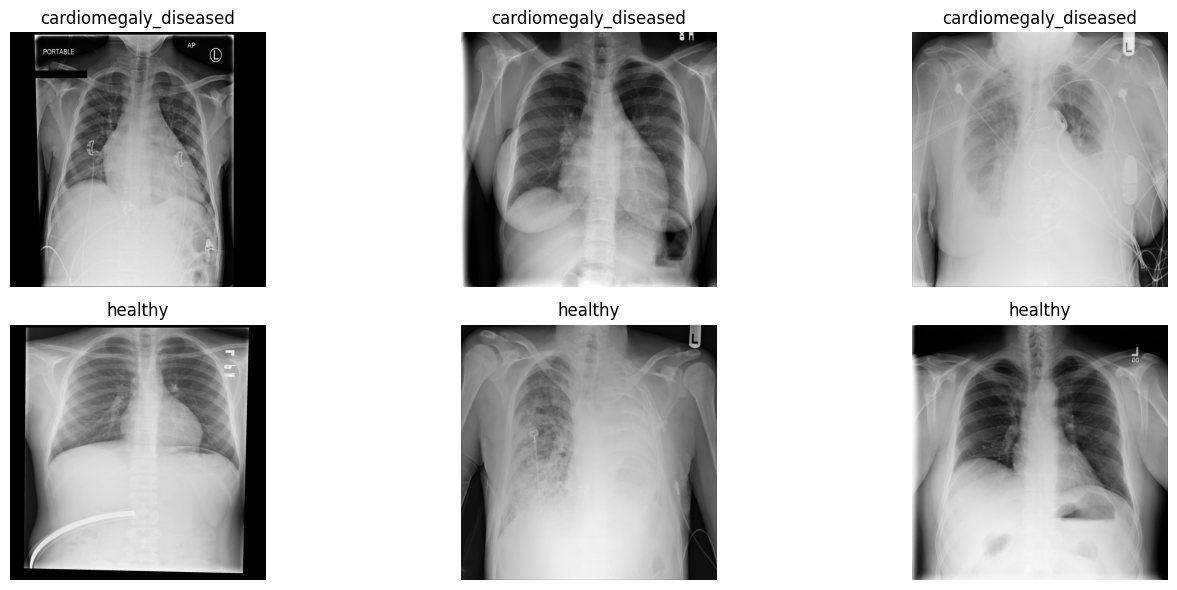

In [8]:
# Get the class names from the dataset
class_names = traindataset.classes

# Plot images from both classes
num_images_per_class = 3  # Number of images to plot per class

# Set up the figure with subplots
fig, axes = plt.subplots(2, num_images_per_class, figsize=(15, 6))

# Iterate over the classes
for i, class_name in enumerate(class_names):
    # Get the indices of images belonging to the current class
    indices = [index for index, (_, label) in enumerate(traindataset.imgs) if label == i]
    
    # Select random indices for plotting
    random_indices = random.sample(indices, num_images_per_class)
    
    # Plot the images
    for j, index in enumerate(random_indices):
        # Get the image and its corresponding label
        image_path, label = traindataset.imgs[index]
        image = PIL.Image.open(image_path)
        
        # Plot the image in the corresponding subplot
        axes[i, j].imshow(image,cmap = 'gray')
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [10]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid','test']}

traindataset = image_datasets['train']
validdataset = image_datasets['valid']
testdataset = image_datasets['test']

batch_size = 16

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid','test']}

print(dataloaders)


traindataloader = dataloaders['train']
validdataloader = dataloaders['valid']
testdataloader = dataloaders['test']

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f6327c20df0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f6327c20d00>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f6327c13430>}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

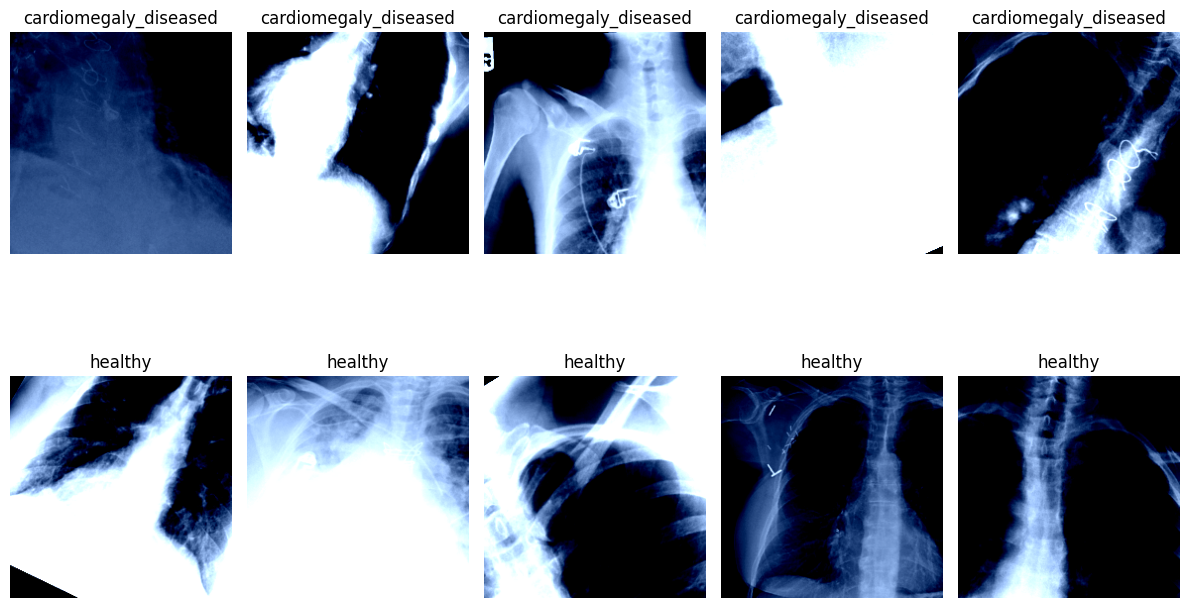

In [11]:
import matplotlib.pyplot as plt
import random

# Get the class names from the dataset
class_names = traindataset.classes

# Plot transformed images from each class
num_images_per_class = 5  # Number of images to plot per class

# Set up the figure with subplots
fig, axes = plt.subplots(len(class_names), num_images_per_class, figsize=(12, 8))

# Iterate over the classes
for i, class_name in enumerate(class_names):
    # Get the indices of images belonging to the current class
    indices = [index for index, (_, label) in enumerate(traindataset.imgs) if label == i]
    
    # Select random indices for plotting
    random_indices = random.sample(indices, num_images_per_class)
    
    # Plot the images
    for j, index in enumerate(random_indices):
        # Get the transformed image and its corresponding label
        image, label = traindataset[index]
        
        # Plot the transformed image in the corresponding subplot
        axes[i, j].imshow(image.permute(1, 2, 0).numpy())
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
class Net(nn.Module):
    def __init__(self, model):
        super(Net, self).__init__()
        self.resnet = nn.Sequential(*list(model.children())[:-1])
        self.fc = nn.Linear(in_features=2048, out_features=2)

    def forward(self, x):
        x = self.resnet(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

resnet152 = models.resnet152(pretrained=True)
net = Net(resnet152)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet152 = resnet152.to(device)

# Print the summary of the model
summary(resnet152, input_size=(3, 224, 224))

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, net.parameters()), lr=0.0001, momentum=0.9)

In [13]:
def valid_model(model, criterion):
    best_acc = 0.0
    running_loss = 0.0
    running_corrects = 0
    model = model.to(device)
    for inputs, labels in validdataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        with torch.no_grad():
            outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels)
    epoch_loss = running_loss / dataset_sizes['valid']
    epoch_acc = running_corrects.double() / dataset_sizes['valid']
    print('{} Loss: {:.4f} Acc: {:.4f}'.format('valid', epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc.item()

In [14]:
def test_model(model, criterion):
    best_acc = 0.0
    running_loss = 0.0
    running_corrects = 0
    model = model.to(device)
    for inputs, labels in testdataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        with torch.no_grad():
            outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels)
    epoch_loss = running_loss / dataset_sizes['test']
    epoch_acc = running_corrects.double() / dataset_sizes['test']
    print('{} Loss: {:.4f} Acc: {:.4f}'.format('test', epoch_loss, epoch_acc))

In [15]:
def train_model(model, criterion, optimizer, num_epochs=5):
    since = time.time()
    best_acc = 0.0
    train_loss_values = []
    train_acc_values = []
    valid_loss_values = []
    valid_acc_values = []
    for epoch in range(num_epochs):
        ssince = time.time()
        print('Epoch {}'.format(epoch))
        running_loss = 0.0
        running_corrects = 0
        model = model.to(device)
        for inputs, labels in traindataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            model.train()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels)
        epoch_loss = running_loss / dataset_sizes['train']
        epoch_acc = running_corrects.double() / dataset_sizes['train']
        train_loss_values.append(epoch_loss)
        train_acc_values.append(epoch_acc.item())
        valid_loss, valid_acc = valid_model(model, criterion)
        valid_loss_values.append(valid_loss)
        valid_acc_values.append(valid_acc)
        time_elapsed = time.time() - ssince
        print('Epoch {} Loss: {:.4f} Acc: {:.4f}'.format(epoch, epoch_loss, epoch_acc))
        print('Time elapsed: {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(max(valid_acc_values)))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_loss_values, label='Train')
    plt.plot(range(num_epochs), valid_loss_values, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_acc_values, label='Train')
    plt.plot(range(num_epochs), valid_acc_values, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return model

Epoch 0
valid Loss: 0.0379 Acc: 0.6836
Epoch 0 Loss: 0.0415 Acc: 0.6067
Time elapsed: 3m 14s

Epoch 1
valid Loss: 0.0350 Acc: 0.7282
Epoch 1 Loss: 0.0384 Acc: 0.6800
Time elapsed: 3m 9s

Epoch 2
valid Loss: 0.0328 Acc: 0.7525
Epoch 2 Loss: 0.0367 Acc: 0.7004
Time elapsed: 3m 8s

Epoch 3
valid Loss: 0.0318 Acc: 0.7586
Epoch 3 Loss: 0.0354 Acc: 0.7156
Time elapsed: 3m 22s

Epoch 4
valid Loss: 0.0297 Acc: 0.7809
Epoch 4 Loss: 0.0332 Acc: 0.7462
Time elapsed: 3m 12s

Epoch 5
valid Loss: 0.0285 Acc: 0.7992
Epoch 5 Loss: 0.0327 Acc: 0.7368
Time elapsed: 3m 18s

Epoch 6
valid Loss: 0.0287 Acc: 0.7951
Epoch 6 Loss: 0.0312 Acc: 0.7655
Time elapsed: 3m 8s

Epoch 7
valid Loss: 0.0267 Acc: 0.8093
Epoch 7 Loss: 0.0305 Acc: 0.7709
Time elapsed: 3m 9s

Epoch 8
valid Loss: 0.0266 Acc: 0.8256
Epoch 8 Loss: 0.0305 Acc: 0.7681
Time elapsed: 3m 22s

Epoch 9
valid Loss: 0.0265 Acc: 0.8012
Epoch 9 Loss: 0.0303 Acc: 0.7637
Time elapsed: 3m 34s

Epoch 10
valid Loss: 0.0265 Acc: 0.8073
Epoch 10 Loss: 0.0301 Ac

valid Loss: 0.0266 Acc: 0.8600
Epoch 87 Loss: 0.0148 Acc: 0.8994
Time elapsed: 3m 8s

Epoch 88
valid Loss: 0.0288 Acc: 0.8479
Epoch 88 Loss: 0.0148 Acc: 0.8964
Time elapsed: 3m 7s

Epoch 89
valid Loss: 0.0291 Acc: 0.8499
Epoch 89 Loss: 0.0141 Acc: 0.9066
Time elapsed: 3m 17s

Epoch 90
valid Loss: 0.0278 Acc: 0.8458
Epoch 90 Loss: 0.0135 Acc: 0.9071
Time elapsed: 3m 9s

Epoch 91
valid Loss: 0.0282 Acc: 0.8519
Epoch 91 Loss: 0.0136 Acc: 0.9071
Time elapsed: 3m 7s

Epoch 92
valid Loss: 0.0278 Acc: 0.8621
Epoch 92 Loss: 0.0142 Acc: 0.9068
Time elapsed: 3m 14s

Epoch 93
valid Loss: 0.0285 Acc: 0.8418
Epoch 93 Loss: 0.0135 Acc: 0.9073
Time elapsed: 3m 10s

Epoch 94
valid Loss: 0.0285 Acc: 0.8560
Epoch 94 Loss: 0.0136 Acc: 0.9043
Time elapsed: 3m 5s

Epoch 95
valid Loss: 0.0286 Acc: 0.8499
Epoch 95 Loss: 0.0139 Acc: 0.9020
Time elapsed: 3m 9s

Epoch 96
valid Loss: 0.0296 Acc: 0.8540
Epoch 96 Loss: 0.0132 Acc: 0.9068
Time elapsed: 3m 9s

Epoch 97
valid Loss: 0.0305 Acc: 0.8540
Epoch 97 Loss: 0

valid Loss: 0.0340 Acc: 0.8540
Epoch 172 Loss: 0.0083 Acc: 0.9476
Time elapsed: 3m 5s

Epoch 173
valid Loss: 0.0419 Acc: 0.8641
Epoch 173 Loss: 0.0086 Acc: 0.9440
Time elapsed: 3m 4s

Epoch 174
valid Loss: 0.0372 Acc: 0.8519
Epoch 174 Loss: 0.0092 Acc: 0.9407
Time elapsed: 3m 6s

Epoch 175
valid Loss: 0.0335 Acc: 0.8519
Epoch 175 Loss: 0.0088 Acc: 0.9417
Time elapsed: 3m 5s

Epoch 176
valid Loss: 0.0369 Acc: 0.8763
Epoch 176 Loss: 0.0089 Acc: 0.9427
Time elapsed: 3m 6s

Epoch 177
valid Loss: 0.0364 Acc: 0.8661
Epoch 177 Loss: 0.0084 Acc: 0.9491
Time elapsed: 3m 4s

Epoch 178
valid Loss: 0.0307 Acc: 0.8560
Epoch 178 Loss: 0.0087 Acc: 0.9437
Time elapsed: 3m 5s

Epoch 179
valid Loss: 0.0365 Acc: 0.8540
Epoch 179 Loss: 0.0095 Acc: 0.9376
Time elapsed: 3m 6s

Epoch 180
valid Loss: 0.0346 Acc: 0.8580
Epoch 180 Loss: 0.0082 Acc: 0.9442
Time elapsed: 3m 7s

Epoch 181
valid Loss: 0.0394 Acc: 0.8763
Epoch 181 Loss: 0.0077 Acc: 0.9483
Time elapsed: 3m 5s

Epoch 182
valid Loss: 0.0352 Acc: 0.8702

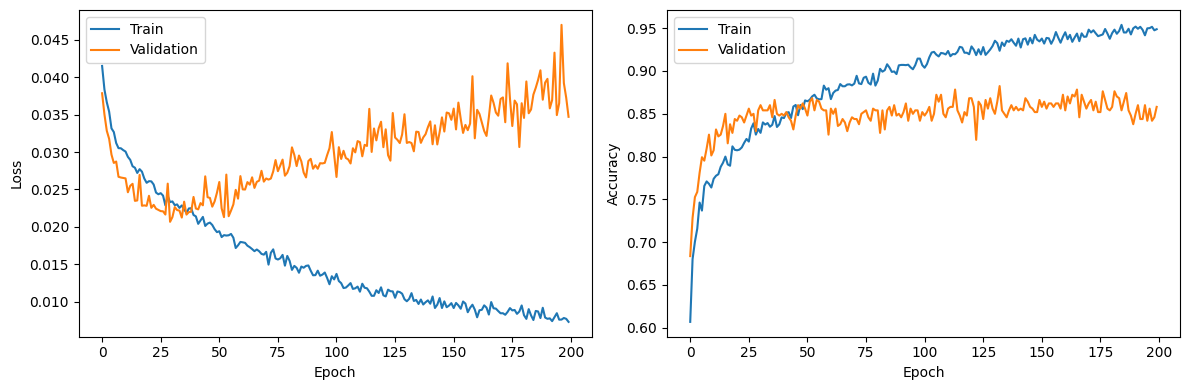

test Loss: 0.0280 Acc: 0.8735


In [18]:
epochs = 200
model = train_model(net, criterion, optimizer, epochs)
test_model(model, criterion)
torch.save(model, r'./models/11_07_23.pkl')